### Connecting to the European Soccer Database

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

try:
    sqliteConnection = sqlite3.connect('database.sqlite')
    #cursor = sqliteConnection.cursor()
    print("Database created and Successfully Connected to SQLite")
except sqlite3.Error as error:
    print("Error while connecting to sqlite", error)

Database created and Successfully Connected to SQLite


### Populating the 7 tables in the database to 7 Pandas Dataframes

In [2]:
country_query = "SELECT * from Country"
country_df = pd.read_sql_query(country_query, sqliteConnection)

league_query = "SELECT * from League"
league_df = pd.read_sql_query(league_query, sqliteConnection)

match_query = "SELECT * from Match"
match_df = pd.read_sql_query(match_query, sqliteConnection)

player_query = "SELECT * from Player"
player_df = pd.read_sql_query(player_query, sqliteConnection)

playerAttributes_query = "SELECT * from Player_Attributes"
playerAttributes_df = pd.read_sql_query(playerAttributes_query, sqliteConnection)

team_query = "SELECT * from Team"
team_df = pd.read_sql_query(team_query, sqliteConnection)

teamAttributes_query = "SELECT * from Team_Attributes"
teamAttributes_df = pd.read_sql_query(teamAttributes_query, sqliteConnection)

### Cleaning the Country Dataframe

In [3]:
del country_df['id']
country_df.insert(0, 'Country_id', range(1, len(country_df)+1))
country_df = country_df.rename(columns={"name": "Country_Name"})
country_df

,Country_id,Country_Name
0,1,Belgium
1,2,England
2,3,France
3,4,Germany
4,5,Italy
5,6,Netherlands
6,7,Poland
7,8,Portugal
8,9,Scotland
9,10,Spain


### Cleaning the League Dataframe

In [4]:
del league_df['id']
del league_df['country_id']
league_df.insert(0, 'League_id', range(1, len(league_df)+1))
league_df = league_df.rename(columns={"name": "League_Name"})
league_df

,League_id,League_Name
0,1,Belgium Jupiler League
1,2,England Premier League
2,3,France Ligue 1
3,4,Germany 1. Bundesliga
4,5,Italy Serie A
5,6,Netherlands Eredivisie
6,7,Poland Ekstraklasa
7,8,Portugal Liga ZON Sagres
8,9,Scotland Premier League
9,10,Spain LIGA BBVA


### Cleaning the Match Dataframe

In [5]:
match_df = match_df.rename(columns={"id": "Match_id"})

#Replacing the old country_id values with the Country_Name values for better readability
match_df['country_id'] = match_df['country_id'].replace(1,'Belgium')
match_df['country_id'] = match_df['country_id'].replace(1729,'England')
match_df['country_id'] = match_df['country_id'].replace(4769,'France')
match_df['country_id'] = match_df['country_id'].replace(7809,'Germany')
match_df['country_id'] = match_df['country_id'].replace(10257,'Italy')
match_df['country_id'] = match_df['country_id'].replace(13274,'Netherlands')
match_df['country_id'] = match_df['country_id'].replace(15722,'Poland')
match_df['country_id'] = match_df['country_id'].replace(17642,'Portugal')
match_df['country_id'] = match_df['country_id'].replace(19694,'Scotland')
match_df['country_id'] = match_df['country_id'].replace(21518,'Spain')
match_df['country_id'] = match_df['country_id'].replace(24558,'Switzerland')
match_df = match_df.rename(columns={"country_id": "Country_Name"})

#Replacing the old league_id values with the League_Name values for better readability
match_df['league_id'] = match_df['league_id'].replace(1,'Belgium Jupiler League')
match_df['league_id'] = match_df['league_id'].replace(1729,'England Premier League')
match_df['league_id'] = match_df['league_id'].replace(4769,'France Ligue 1')
match_df['league_id'] = match_df['league_id'].replace(7809,'Germany 1. Bundesliga')
match_df['league_id'] = match_df['league_id'].replace(10257,'Italy Serie A')
match_df['league_id'] = match_df['league_id'].replace(13274,'Netherlands Eredivisie')
match_df['league_id'] = match_df['league_id'].replace(15722,'Poland Ekstraklasa')
match_df['league_id'] = match_df['league_id'].replace(17642,'Portugal Liga ZON Sagres')
match_df['league_id'] = match_df['league_id'].replace(19694,'Scotland Premier League')
match_df['league_id'] = match_df['league_id'].replace(21518,'Spain LIGA BBVA')
match_df['league_id'] = match_df['league_id'].replace(24558,'Switzerland Super League')
match_df = match_df.rename(columns={"league_id": "League_Name"})
match_df['date'] = pd.to_datetime(match_df['date'], format='%Y/%m/%d %H:%M:%S')
match_df.head()

,Match_id,Country_Name,League_Name,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


### Cleaning the Player Dataframe

In [6]:
missing_values_count_player = player_df.isnull().sum()
print(missing_values_count_player)
duplicateRowsPlayerDF = player_df[player_df.duplicated(['player_api_id', 'player_fifa_api_id'])]
print('Number of duplicates: ' + str(duplicateRowsPlayerDF.shape[0]))
del player_df['id']
player_df.insert(0, 'id', range(1, len(player_df)+1))
player_df['birthday'] = pd.to_datetime(player_df['birthday'], format='%Y/%m/%d %H:%M:%S')
player_df

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64
Number of duplicates: 0


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28,175.26,170


### Cleaning the Player Attributes Dataframe

In [7]:
playerAttributes_df.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [8]:
print('The number of rows before removing duplicates: ' + str(playerAttributes_df.shape[0]))
duplicateRowsPlayerAttributesDF = playerAttributes_df[playerAttributes_df.duplicated(['player_fifa_api_id', 'player_api_id'])]
duplicatePercentage = (duplicateRowsPlayerAttributesDF.shape[0]/playerAttributes_df.shape[0]) * 100
print('The percentage of duplicated rows: ' + str(duplicatePercentage))

The number of rows before removing duplicates: 183978
The percentage of duplicated rows: 93.98351976866799


In [9]:
playerAttributes_df_1 = playerAttributes_df.sort_values('date').drop_duplicates(['player_fifa_api_id', 'player_api_id'],keep='last')
playerAttributes_df_1 = playerAttributes_df_1.sort_values('id')
print('The number of rows after removing duplicates: ' + str(playerAttributes_df_1.shape[0]))
percentageLeft = (playerAttributes_df_1.shape[0]/playerAttributes_df.shape[0]) * 100
print('The percentage of rows left: ' + str(percentageLeft))
playerAttributes_df_1.head(10)

The number of rows after removing duplicates: 11069
The percentage of rows left: 6.0164802313320065


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,39,186170,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,65,140161,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
87,88,17725,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
112,113,158138,27316,2016-04-28 00:00:00,77.0,77.0,left,medium,medium,77.0,...,76.0,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0
139,140,221280,564793,2016-04-21 00:00:00,61.0,74.0,right,medium,high,48.0,...,61.0,42.0,52.0,58.0,57.0,8.0,13.0,14.0,14.0,15.0
146,147,152747,30895,2015-10-16 00:00:00,77.0,77.0,right,high,medium,78.0,...,73.0,62.0,30.0,34.0,35.0,14.0,7.0,7.0,16.0,11.0
172,173,206592,528212,2016-02-25 00:00:00,48.0,56.0,right,medium,medium,12.0,...,15.0,41.0,15.0,15.0,12.0,53.0,41.0,39.0,51.0,53.0
179,180,188621,101042,2015-12-03 00:00:00,69.0,69.0,left,medium,medium,63.0,...,71.0,56.0,67.0,68.0,65.0,7.0,15.0,7.0,10.0,15.0


In [10]:
# get the number of missing values per column
missing_values_count_playerAttributes = playerAttributes_df_1.isnull().sum()

print(missing_values_count_playerAttributes)

total_cells_playerAttributes = np.product(playerAttributes_df_1.shape) 
total_missing_playerAttributes = missing_values_count_playerAttributes.sum()

# percentage of data that is missing
percentage_missign_values_playerAttributes = (total_missing_playerAttributes/total_cells_playerAttributes) * 100
print('Percentage of missing values: '+ str(percentage_missign_values_playerAttributes))

id                       0
player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating           4
potential                4
preferred_foot           4
attacking_work_rate    544
defensive_work_rate      4
crossing                 4
finishing                4
heading_accuracy         4
short_passing            4
volleys                482
dribbling                4
curve                  482
free_kick_accuracy       4
long_passing             4
ball_control             4
acceleration             4
sprint_speed             4
agility                482
reactions                4
balance                482
shot_power               4
jumping                482
stamina                  4
strength                 4
long_shots               4
aggression               4
interceptions            4
positioning              4
vision                 482
penalties                4
marking                  4
standing_tackle          4
sliding_tackle         482
g

In [11]:
rows_with_missing_values = playerAttributes_df_1[playerAttributes_df_1.isna().any(axis=1)]
print('Percentage of rows with missing values: '+ str((rows_with_missing_values.shape[0]/playerAttributes_df_1.shape[0])*100))

Percentage of rows with missing values: 5.908392808745145


In [12]:
# merge with player_df to search on the internet for missing values with player names
df2 = pd.merge(player_df,playerAttributes_df_1,on=['player_api_id','player_fifa_api_id'])
# sort and get the percentage of old players having NaNs
rows_with_null_sorted = df2[df2.isna().any(axis=1)].sort_values('birthday')
end_date = pd.Timestamp(datetime.date(1980,1,1))
rows_with_null_sorted['birthday'] = pd.to_datetime(rows_with_null_sorted['birthday'])
mask = rows_with_null_sorted['birthday'] <= end_date
old_players = rows_with_null_sorted.loc[mask]
old_players

,id_x,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id_y,date,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
289,290,39425,Alberto Fontana,2431,1967-01-23,185.42,161,4840,2009-02-22 00:00:00,77.0,...,NaN,58.0,24.0,27.0,NaN,76.0,79.0,75.0,77.0,77.0
8284,8285,26099,Paolo Maldini,1109,1968-06-26,185.42,187,138695,2009-02-22 00:00:00,77.0,...,NaN,90.0,85.0,82.0,NaN,5.0,21.0,70.0,21.0,21.0
6238,6239,27666,Luca Bucci,12514,1969-03-13,180.34,174,103754,2009-02-22 00:00:00,63.0,...,NaN,33.0,47.0,39.0,NaN,58.0,66.0,69.0,67.0,66.0
2492,2493,23605,Dean Windass,50474,1969-04-01,177.80,183,41818,2010-02-22 00:00:00,66.0,...,NaN,70.0,44.0,38.0,NaN,8.0,20.0,61.0,20.0,20.0
7389,7390,27346,Michael Tarnat,722,1969-10-27,185.42,192,123819,2008-08-30 00:00:00,73.0,...,NaN,87.0,78.0,77.0,NaN,28.0,36.0,80.0,31.0,32.0
4827,4828,30648,Jens Lehmann,805,1969-11-10,190.50,192,80260,2010-02-22 00:00:00,79.0,...,NaN,74.0,21.0,21.0,NaN,77.0,82.0,75.0,88.0,76.0
4122,4123,26003,Hans Vonk,7947,1970-01-30,195.58,183,68729,2009-02-22 00:00:00,69.0,...,NaN,31.0,31.0,22.0,NaN,68.0,69.0,64.0,73.0,70.0
887,888,41881,Antonio Chimenti,4739,1970-06-30,182.88,183,15415,2010-02-22 00:00:00,70.0,...,NaN,50.0,28.0,28.0,NaN,68.0,69.0,70.0,75.0,70.0
3116,3117,27661,Eugenio Corini,5244,1970-07-30,172.72,148,52029,2009-02-22 00:00:00,72.0,...,NaN,70.0,44.0,69.0,NaN,6.0,22.0,73.0,22.0,22.0
8512,8513,11716,Pedro Roma,20490,1970-08-13,185.42,183,142017,2009-02-22 00:00:00,70.0,...,NaN,42.0,23.0,36.0,NaN,70.0,69.0,66.0,66.0,71.0


In [13]:
rows_with_missing_values_old_players = old_players[old_players.isna().any(axis=1)]
print('Percentage of rows of old players with missing values: '+ str((rows_with_missing_values_old_players.shape[0]/playerAttributes_df_1.shape[0])*100))

Percentage of rows of old players with missing values: 2.7915800885355497


In [14]:
playerAttributes_df_1 = playerAttributes_df_1.dropna()
playerAttributes_df_1

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,39,186170,162549,2016-01-07 00:00:00,65.0,67.0,right,medium,medium,64.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,65,140161,30572,2016-04-21 00:00:00,69.0,69.0,right,medium,medium,57.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
87,88,17725,23780,2015-12-24 00:00:00,70.0,70.0,right,medium,medium,46.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
112,113,158138,27316,2016-04-28 00:00:00,77.0,77.0,left,medium,medium,77.0,...,76.0,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0
139,140,221280,564793,2016-04-21 00:00:00,61.0,74.0,right,medium,high,48.0,...,61.0,42.0,52.0,58.0,57.0,8.0,13.0,14.0,14.0,15.0
146,147,152747,30895,2015-10-16 00:00:00,77.0,77.0,right,high,medium,78.0,...,73.0,62.0,30.0,34.0,35.0,14.0,7.0,7.0,16.0,11.0
172,173,206592,528212,2016-02-25 00:00:00,48.0,56.0,right,medium,medium,12.0,...,15.0,41.0,15.0,15.0,12.0,53.0,41.0,39.0,51.0,53.0
179,180,188621,101042,2015-12-03 00:00:00,69.0,69.0,left,medium,medium,63.0,...,71.0,56.0,67.0,68.0,65.0,7.0,15.0,7.0,10.0,15.0


In [15]:
missing_values_count_playerAttributes = playerAttributes_df_1.isnull().sum()
print(missing_values_count_playerAttributes)

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [16]:
playerAttributes_df_1 = playerAttributes_df_1.rename(columns={"date": "date_modified"})
playerAttributes_df_1['date_modified'] = pd.to_datetime(playerAttributes_df_1['date_modified'], format='%Y/%m/%d %H:%M:%S')
del playerAttributes_df_1['id']
playerAttributes_df_1.insert(0, 'id', range(1, len(playerAttributes_df_1)+1))
playerAttributes_df_1

,id,player_fifa_api_id,player_api_id,date_modified,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
5,2,189615,155782,2016-04-21,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
38,3,186170,162549,2016-01-07,65.0,67.0,right,medium,medium,64.0,...,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0
64,4,140161,30572,2016-04-21,69.0,69.0,right,medium,medium,57.0,...,54.0,37.0,72.0,71.0,68.0,15.0,12.0,13.0,12.0,11.0
87,5,17725,23780,2015-12-24,70.0,70.0,right,medium,medium,46.0,...,41.0,45.0,75.0,73.0,71.0,8.0,6.0,16.0,12.0,11.0
112,6,158138,27316,2016-04-28,77.0,77.0,left,medium,medium,77.0,...,76.0,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0
139,7,221280,564793,2016-04-21,61.0,74.0,right,medium,high,48.0,...,61.0,42.0,52.0,58.0,57.0,8.0,13.0,14.0,14.0,15.0
146,8,152747,30895,2015-10-16,77.0,77.0,right,high,medium,78.0,...,73.0,62.0,30.0,34.0,35.0,14.0,7.0,7.0,16.0,11.0
172,9,206592,528212,2016-02-25,48.0,56.0,right,medium,medium,12.0,...,15.0,41.0,15.0,15.0,12.0,53.0,41.0,39.0,51.0,53.0
179,10,188621,101042,2015-12-03,69.0,69.0,left,medium,medium,63.0,...,71.0,56.0,67.0,68.0,65.0,7.0,15.0,7.0,10.0,15.0


In [17]:
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 116)

### Cleaning the Home Players X1 to X11 Coordinates (1/2)
Getting the missing X1 to X11 values from the complete records of the home teams in the table

In [18]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            home_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            home_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        home_players_df = home_players_df.dropna(subset = ['home_player_X'+str(m)])
        home_player_X_rows = match_df[match_df['home_player_X'+str(m)].isnull()]
        if n < 10:
            home_player_X_rows = home_player_X_rows[home_player_X_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            home_player_X_rows = home_player_X_rows[home_player_X_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        home_player_X_rows = home_player_X_rows.reset_index()

        for i in range(0, home_player_X_rows.shape[0]):
            return_rows = home_players_df[home_players_df['home_team_api_id'] == home_player_X_rows['home_team_api_id'][i]]
            
            if return_rows.size != 0:
                X_Player = return_rows['home_player_X'+str(m)].head(1)
                null_X_rows = match_df[(match_df['home_team_api_id'] == home_player_X_rows['home_team_api_id'][i])]
                null_X_rows = null_X_rows[null_X_rows['home_player_X'+str(m)].isnull()]
                
                if n < 10:
                    null_X_rows = null_X_rows[null_X_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_X_rows = null_X_rows[null_X_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_X_rows.shape[0]):
                    indices.append(null_X_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'home_player_X'+str(m)] = int(X_Player[X_Player.index[0]])

### Cleaning the Home Players X1 to X11 Coordinates (2/2)
Getting the missing X1 to X11 values from the complete records of the away teams in the table

In [19]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            home_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            home_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        home_players_df = home_players_df.dropna(subset = ['away_player_X'+str(m)])
        home_player_X_rows = match_df[match_df['home_player_X'+str(m)].isnull()]
        if n < 10:
            home_player_X_rows = home_player_X_rows[home_player_X_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            home_player_X_rows = home_player_X_rows[home_player_X_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        home_player_X_rows = home_player_X_rows.reset_index()

        for i in range(0, home_player_X_rows.shape[0]):
            return_rows = home_players_df[home_players_df['away_team_api_id'] == home_player_X_rows['home_team_api_id'][i]]
            
            if return_rows.size != 0:
                X_Player = return_rows['away_player_X'+str(m)].head(1)
                null_X_rows = match_df[(match_df['away_team_api_id'] == home_player_X_rows['home_team_api_id'][i])]
                null_X_rows = null_X_rows[null_X_rows['home_player_X'+str(m)].isnull()]
                
                if n < 10:
                    null_X_rows = null_X_rows[null_X_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_X_rows = null_X_rows[null_X_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_X_rows.shape[0]):
                    indices.append(null_X_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'home_player_X'+str(m)] = int(X_Player[X_Player.index[0]])

### Cleaning the Home Players Y1 to Y11 Coordinates (1/2)
Getting the missing Y1 to Y11 values from the complete records of the home teams in the table

In [20]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            home_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            home_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        home_players_df = home_players_df.dropna(subset = ['home_player_Y'+str(m)])
        home_player_Y_rows = match_df[match_df['home_player_Y'+str(m)].isnull()]
        if n < 10:
            home_player_Y_rows = home_player_Y_rows[home_player_Y_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            home_player_Y_rows = home_player_Y_rows[home_player_Y_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        home_player_Y_rows = home_player_Y_rows.reset_index()

        for i in range(0, home_player_Y_rows.shape[0]):
            return_rows = home_players_df[home_players_df['home_team_api_id'] == home_player_Y_rows['home_team_api_id'][i]]
            
            if return_rows.size != 0:
                Y_Player = return_rows['home_player_Y'+str(m)].head(1)
                null_Y_rows = match_df[(match_df['home_team_api_id'] == home_player_Y_rows['home_team_api_id'][i])]
                null_Y_rows = null_Y_rows[null_Y_rows['home_player_Y'+str(m)].isnull()]
                
                if n < 10:
                    null_Y_rows = null_Y_rows[null_Y_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_Y_rows = null_Y_rows[null_Y_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_Y_rows.shape[0]):
                    indices.append(null_Y_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'home_player_Y'+str(m)] = int(Y_Player[Y_Player.index[0]])

### Cleaning the Home Players Y1 to Y11 Coordinates (2/2)
Getting the missing Y1 to Y11 values from the complete records of the away teams in the table

In [21]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            home_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            home_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        home_players_df = home_players_df.dropna(subset = ['away_player_Y'+str(m)])
        home_player_Y_rows = match_df[match_df['home_player_Y'+str(m)].isnull()]
        if n < 10:
            home_player_Y_rows = home_player_Y_rows[home_player_Y_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            home_player_Y_rows = home_player_Y_rows[home_player_Y_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        home_player_Y_rows = home_player_Y_rows.reset_index()

        for i in range(0, home_player_Y_rows.shape[0]):
            return_rows = home_players_df[home_players_df['away_team_api_id'] == home_player_Y_rows['home_team_api_id'][i]]
            
            if return_rows.size != 0:
                Y_Player = return_rows['away_player_Y'+str(m)].head(1)
                null_Y_rows = match_df[(match_df['away_team_api_id'] == home_player_Y_rows['home_team_api_id'][i])]
                null_Y_rows = null_Y_rows[null_Y_rows['home_player_Y'+str(m)].isnull()]
                
                if n < 10:
                    null_Y_rows = null_Y_rows[null_Y_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_Y_rows = null_Y_rows[null_Y_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_Y_rows.shape[0]):
                    indices.append(null_Y_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'home_player_Y'+str(m)] = int(Y_Player[Y_Player.index[0]])

### Cleaning the Away Players X1 to X11 Coordinates (1/2)
Getting the missing X1 to X11 values from the complete records of the away teams in the table

In [22]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            away_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            away_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        away_players_df = away_players_df.dropna(subset = ['away_player_X'+str(m)])

        away_player_X_rows = match_df[match_df['away_player_X'+str(m)].isnull()]
        if n < 10:
            away_player_X_rows = away_player_X_rows[away_player_X_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            away_player_X_rows = away_player_X_rows[away_player_X_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        away_player_X_rows = away_player_X_rows.reset_index()

        for i in range(0, away_player_X_rows.shape[0]):
            return_rows = away_players_df[away_players_df['away_team_api_id'] == away_player_X_rows['away_team_api_id'][i]]
            
            if return_rows.size != 0:
                X_Player = return_rows['away_player_X'+str(m)].head(1)
                null_X_rows = match_df[(match_df['away_team_api_id'] == away_player_X_rows['away_team_api_id'][i])]
                null_X_rows = null_X_rows[null_X_rows['away_player_X'+str(m)].isnull()]
                
                if n < 10:
                    null_X_rows = null_X_rows[null_X_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_X_rows = null_X_rows[null_X_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_X_rows.shape[0]):
                    indices.append(null_X_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'away_player_X'+str(m)] = int(X_Player[X_Player.index[0]])

### Cleaning the Away Players X1 to X11 Coordinates (2/2)
Getting the missing X1 to X11 values from the complete records of the home teams in the table

In [23]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            away_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            away_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        away_players_df = away_players_df.dropna(subset = ['home_player_X'+str(m)])
        away_player_X_rows = match_df[match_df['away_player_X'+str(m)].isnull()]
        if n < 10:
            away_player_X_rows = away_player_X_rows[away_player_X_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            away_player_X_rows = away_player_X_rows[away_player_X_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        away_player_X_rows = away_player_X_rows.reset_index()

        for i in range(0, away_player_X_rows.shape[0]):
            return_rows = away_players_df[away_players_df['home_team_api_id'] == away_player_X_rows['away_team_api_id'][i]]
            
            if return_rows.size != 0:
                X_Player = return_rows['home_player_X'+str(m)].head(1)
                null_X_rows = match_df[(match_df['home_team_api_id'] == away_player_X_rows['away_team_api_id'][i])]
                null_X_rows = null_X_rows[null_X_rows['away_player_X'+str(m)].isnull()]
                
                if n < 10:
                    null_X_rows = null_X_rows[null_X_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_X_rows = null_X_rows[null_X_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_X_rows.shape[0]):
                    indices.append(null_X_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'away_player_X'+str(m)] = int(X_Player[X_Player.index[0]])

### Cleaning the Away Players Y1 to Y11 Coordinates (1/2)
Getting the missing Y1 to Y11 values from the complete records of the away teams in the table

In [24]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            away_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            away_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        away_players_df = away_players_df.dropna(subset = ['away_player_Y'+str(m)])

        away_player_Y_rows = match_df[match_df['away_player_Y'+str(m)].isnull()]
        if n < 10:
            away_player_Y_rows = away_player_Y_rows[away_player_Y_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            away_player_Y_rows = away_player_Y_rows[away_player_Y_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        away_player_Y_rows = away_player_Y_rows.reset_index()

        for i in range(0, away_player_Y_rows.shape[0]):
            return_rows = away_players_df[away_players_df['away_team_api_id'] == away_player_Y_rows['away_team_api_id'][i]]
            
            if return_rows.size != 0:
                Y_Player = return_rows['away_player_Y'+str(m)].head(1)
                null_Y_rows = match_df[(match_df['away_team_api_id'] == away_player_Y_rows['away_team_api_id'][i])]
                null_Y_rows = null_Y_rows[null_Y_rows['away_player_Y'+str(m)].isnull()]
                
                if n < 10:
                    null_Y_rows = null_Y_rows[null_Y_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_Y_rows = null_Y_rows[null_Y_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_Y_rows.shape[0]):
                    indices.append(null_Y_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'away_player_Y'+str(m)] = int(Y_Player[Y_Player.index[0]])

### Cleaning the Away Players Y1 to Y11 Coordinates (2/2)
Getting the missing Y1 to Y11 values from the complete records of the home teams in the table

In [25]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            away_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            away_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        away_players_df = away_players_df.dropna(subset = ['home_player_Y'+str(m)])
        away_player_Y_rows = match_df[match_df['away_player_Y'+str(m)].isnull()]
        if n < 10:
            away_player_Y_rows = away_player_Y_rows[away_player_Y_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            away_player_Y_rows = away_player_Y_rows[away_player_Y_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        away_player_Y_rows = away_player_Y_rows.reset_index()

        for i in range(0, away_player_Y_rows.shape[0]):
            return_rows = away_players_df[away_players_df['home_team_api_id'] == away_player_Y_rows['away_team_api_id'][i]]
            
            if return_rows.size != 0:
                Y_Player = return_rows['home_player_Y'+str(m)].head(1)
                null_Y_rows = match_df[(match_df['home_team_api_id'] == away_player_Y_rows['away_team_api_id'][i])]
                null_Y_rows = null_Y_rows[null_Y_rows['away_player_Y'+str(m)].isnull()]
                
                if n < 10:
                    null_Y_rows = null_Y_rows[null_Y_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_Y_rows = null_Y_rows[null_Y_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_Y_rows.shape[0]):
                    indices.append(null_Y_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'away_player_Y'+str(m)] = int(Y_Player[Y_Player.index[0]])

### Cleaning the Home Players Columns (1/2)
Getting the missing home player 1 to 11 values from the complete records of the home teams in the table

In [26]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            home_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            home_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        home_players_df = home_players_df.dropna(subset = ['home_player_'+str(m)])

        home_player_rows = match_df[match_df['home_player_'+str(m)].isnull()]
        if n < 10:
            home_player_rows = home_player_rows[home_player_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            home_player_rows = home_player_rows[home_player_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        home_player_rows = home_player_rows.reset_index()

        for i in range(0, home_player_rows.shape[0]):
            return_rows = home_players_df[home_players_df['home_team_api_id'] == home_player_rows['home_team_api_id'][i]]
            
            if return_rows.size != 0:
                Player = return_rows['home_player_'+str(m)].head(1)
                null_rows = match_df[(match_df['home_team_api_id'] == home_player_rows['home_team_api_id'][i])]
                null_rows = null_rows[null_rows['home_player_'+str(m)].isnull()]
                
                if n < 10:
                    null_rows = null_rows[null_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_rows = null_rows[null_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_rows.shape[0]):
                    indices.append(null_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'home_player_'+str(m)] = int(Player[Player.index[0]])

### Cleaning the Home Players Columns (2/2)
Getting the missing home player 1 to 11 values from the complete records of the away teams in the table

In [27]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            home_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            home_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        home_players_df = home_players_df.dropna(subset = ['away_player_'+str(m)])

        home_player_rows = match_df[match_df['home_player_'+str(m)].isnull()]
        if n < 10:
            home_player_rows = home_player_rows[home_player_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            home_player_rows = home_player_rows[home_player_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        home_player_rows = home_player_rows.reset_index()

        for i in range(0, home_player_rows.shape[0]):
            return_rows = home_players_df[home_players_df['away_team_api_id'] == home_player_rows['home_team_api_id'][i]]
            
            if return_rows.size != 0:
                Player = return_rows['away_player_'+str(m)].head(1)
                null_rows = match_df[(match_df['away_team_api_id'] == home_player_rows['home_team_api_id'][i])]
                null_rows = null_rows[null_rows['home_player_'+str(m)].isnull()]
                
                if n < 10:
                    null_rows = null_rows[null_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_rows = null_rows[null_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_rows.shape[0]):
                    indices.append(null_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'home_player_'+str(m)] = int(Player[Player.index[0]])

### Cleaning the Away Players Columns (1/2)
Getting the missing away player 1 to 11 values from the complete records of the away teams in the table

In [28]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            away_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            away_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        away_players_df = away_players_df.dropna(subset = ['away_player_'+str(m)])

        away_player_rows = match_df[match_df['away_player_'+str(m)].isnull()]
        if n < 10:
            away_player_rows = away_player_rows[away_player_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            away_player_rows = away_player_rows[away_player_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        away_player_rows = away_player_rows.reset_index()

        for i in range(0, away_player_rows.shape[0]):
            return_rows = away_players_df[away_players_df['away_team_api_id'] == away_player_rows['away_team_api_id'][i]]
            
            if return_rows.size != 0:
                Player = return_rows['away_player_'+str(m)].head(1)
                null_rows = match_df[(match_df['away_team_api_id'] == away_player_rows['away_team_api_id'][i])]
                null_rows = null_rows[null_rows['away_player_'+str(m)].isnull()]
                
                if n < 10:
                    null_rows = null_rows[null_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_rows = null_rows[null_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_rows.shape[0]):
                    indices.append(null_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'away_player_'+str(m)] = int(Player[Player.index[0]])

### Cleaning the Away Players Columns (2/2)
Getting the missing away player 1 to 11 values from the complete records of the home teams in the table

In [29]:
for n in range(8,16):
    for m in range(1,12):
        if n < 10:
            away_players_df = match_df[(match_df['season'] == '200'+str(n)+'/'+'200'+str(n+1))]
        else:
            away_players_df = match_df[(match_df['season'] == '20'+str(n)+'/'+'20'+str(n+1))]
        
        away_players_df = away_players_df.dropna(subset = ['home_player_'+str(m)])

        away_player_rows = match_df[match_df['away_player_'+str(m)].isnull()]
        if n < 10:
            away_player_rows = away_player_rows[away_player_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
        else:
            away_player_rows = away_player_rows[away_player_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
        
        away_player_rows = away_player_rows.reset_index()

        for i in range(0, away_player_rows.shape[0]):
            return_rows = away_players_df[away_players_df['home_team_api_id'] == away_player_rows['away_team_api_id'][i]]
            
            if return_rows.size != 0:
                Player = return_rows['home_player_'+str(m)].head(1)
                null_rows = match_df[(match_df['home_team_api_id'] == away_player_rows['away_team_api_id'][i])]
                null_rows = null_rows[null_rows['away_player_'+str(m)].isnull()]
                
                if n < 10:
                    null_rows = null_rows[null_rows['season'] == '200'+str(n)+'/'+'200'+str(n+1)]
                else:
                    null_rows = null_rows[null_rows['season'] == '20'+str(n)+'/'+'20'+str(n+1)]
                    
                indices = []
                for j in range(0, null_rows.shape[0]):
                    indices.append(null_rows.index[j])
                for k in range(0, len(indices)):
                    index = match_df.index[indices[k]]
                    match_df.at[index, 'away_player_'+str(m)] = int(Player[Player.index[0]])

In [30]:
match_df.isnull().sum()

Match_id                0
Country_Name            0
League_Name             0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1200
home_player_X2       1200
home_player_X3       1200
home_player_X4       1200
home_player_X5       1200
home_player_X6       1200
home_player_X7       1200
home_player_X8       1200
home_player_X9       1200
home_player_X10      1200
home_player_X11      1200
away_player_X1       1200
away_player_X2       1200
away_player_X3       1200
away_player_X4       1200
away_player_X5       1200
away_player_X6       1200
away_player_X7       1200
away_player_X8       1200
away_player_X9       1200
away_player_X10      1200
away_player_X11      1200
home_player_Y1       1200
home_player_Y2       1200
home_player_Y3       1200
home_player_Y4       1200
home_player_Y5       1200
home_player_

### Dropping the Null Values From Match Dataframe

In [31]:
match_df.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H', 'B365D',
               'B365A', 'BWH', 'BWD', 'BWA','IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA','PSH', 'PSD', 'PSA','WHH', 'WHD', 'WHA',
               'SJH', 'SJD','SJA', 'VCH','VCD','VCA','GBH','GBD','GBA','BSH','BSD','BSA'], axis=1, inplace=True)

In [32]:
match_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [33]:
match_df.isnull().sum()

Match_id            0
Country_Name        0
League_Name         0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
home_player_X1      0
home_player_X2      0
home_player_X3      0
home_player_X4      0
home_player_X5      0
home_player_X6      0
home_player_X7      0
home_player_X8      0
home_player_X9      0
home_player_X10     0
home_player_X11     0
away_player_X1      0
away_player_X2      0
away_player_X3      0
away_player_X4      0
away_player_X5      0
away_player_X6      0
away_player_X7      0
away_player_X8      0
away_player_X9      0
away_player_X10     0
away_player_X11     0
home_player_Y1      0
home_player_Y2      0
home_player_Y3      0
home_player_Y4      0
home_player_Y5      0
home_player_Y6      0
home_player_Y7      0
home_player_Y8      0
home_player_Y9      0
home_player_Y10     0
home_player_Y11     0
away_player_Y1      0
away_playe

### Cleaning the Team Dataframe

In [34]:
missing_values_count_team = team_df.isnull().sum()
print(missing_values_count_team)

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


In [35]:
team_api_id_1=team_df[['team_api_id','team_fifa_api_id']]
team_api_id_2=teamAttributes_df[['team_api_id','team_fifa_api_id']]
team_api_id_2.drop_duplicates(subset ="team_fifa_api_id", keep = "last", inplace = True)
missing_api_1=team_api_id_1[team_api_id_1["team_fifa_api_id"].isnull()]
found_api_2= team_api_id_2.loc[team_api_id_2['team_api_id'].isin(missing_api_1)]
found_api_2


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,team_api_id,team_fifa_api_id


In [36]:
team_df.dropna(inplace=True)
missing_values_count_team = team_df.isnull().sum()
print(missing_values_count_team)

id                  0
team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
dtype: int64


In [37]:
duplicateRowsTeamDF = team_df[team_df.duplicated(['team_long_name'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_long_name: ' + str(duplicateNumber))

duplicateRowsTeamDF = team_df[team_df.duplicated(['team_fifa_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_fifa_api_id: ' + str(duplicateNumber))

duplicateRowsTeamDF = team_df[team_df.duplicated(['team_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_api_id: ' + str(duplicateNumber))

The number of duplicated rows in team_long_name: 3
The number of duplicated rows in team_fifa_api_id: 3
The number of duplicated rows in team_api_id: 0


In [38]:
duplicate_rows_df= team_df[team_df.duplicated(['team_fifa_api_id', 'team_long_name'], keep=False)]
display(duplicate_rows_df)
target_team_api_id=duplicate_rows_df['team_fifa_api_id'].tolist()
teamAttributes_subset=teamAttributes_df.loc[teamAttributes_df['team_fifa_api_id'].isin(target_team_api_id)]
display(teamAttributes_subset.sort_values(['team_fifa_api_id','team_api_id']))

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1394,1395,301,8024,2011-02-22 00:00:00,63,Balanced,NaN,Little,48,Mixed,Organised,48,Normal,68,Lots,53,Normal,Organised,37,Medium,58,Press,63,Normal,Cover
1395,1396,301,8024,2012-02-22 00:00:00,66,Balanced,NaN,Little,72,Long,Organised,70,Risky,61,Normal,54,Normal,Organised,32,Deep,32,Contain,62,Normal,Cover
1396,1397,301,8024,2013-09-20 00:00:00,66,Balanced,NaN,Little,59,Mixed,Organised,43,Normal,61,Normal,54,Normal,Organised,32,Deep,43,Press,46,Normal,Cover
1397,1398,301,8024,2014-09-19 00:00:00,66,Balanced,52.0,Normal,72,Long,Organised,66,Normal,67,Lots,51,Normal,Organised,36,Medium,38,Press,65,Normal,Cover
754,755,301,8244,2011-02-22 00:00:00,63,Balanced,NaN,Little,48,Mixed,Organised,48,Normal,68,Lots,53,Normal,Organised,37,Medium,58,Press,63,Normal,Cover
755,756,301,8244,2012-02-22 00:00:00,66,Balanced,NaN,Little,72,Long,Organised,70,Risky,61,Normal,54,Normal,Organised,32,Deep,32,Contain,62,Normal,Cover
756,757,301,8244,2013-09-20 00:00:00,66,Balanced,NaN,Little,59,Mixed,Organised,43,Normal,61,Normal,54,Normal,Organised,32,Deep,43,Press,46,Normal,Cover
757,758,301,8244,2014-09-19 00:00:00,66,Balanced,52.0,Normal,72,Long,Organised,66,Normal,67,Lots,51,Normal,Organised,36,Medium,38,Press,65,Normal,Cover
522,523,111429,8020,2010-02-22 00:00:00,30,Slow,NaN,Little,50,Mixed,Organised,45,Normal,35,Normal,70,Lots,Organised,60,Medium,70,Double,55,Normal,Cover
523,524,111429,8020,2011-02-22 00:00:00,46,Balanced,NaN,Little,38,Mixed,Organised,36,Normal,33,Little,53,Normal,Organised,53,Medium,54,Press,55,Normal,Cover


In [39]:
team_df=team_df.sort_values(['team_fifa_api_id','team_api_id'])
team_df.drop_duplicates(subset =['team_fifa_api_id', 'team_long_name'], keep = 'last', inplace = True)

duplicateRowsTeamDF = team_df[team_df.duplicated(['team_long_name'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_long_name: ' + str(duplicateNumber))

duplicateRowsTeamDF = team_df[team_df.duplicated(['team_fifa_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_fifa_api_id: ' + str(duplicateNumber))

The number of duplicated rows in team_long_name: 0
The number of duplicated rows in team_fifa_api_id: 0


In [40]:
duplicateRowsTeamDF = team_df[team_df.duplicated(['team_long_name'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_long_name: ' + str(duplicateNumber))

duplicateRowsTeamDF = team_df[team_df.duplicated(['team_fifa_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_fifa_api_id: ' + str(duplicateNumber))

duplicateRowsTeamDF = team_df[team_df.duplicated(['team_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_api_id: ' + str(duplicateNumber))

print('The number of missing values in each column:')
team_df.dropna(inplace=True)
missing_values_count_team= team_df.isnull().sum()
print(missing_values_count_team)

The number of duplicated rows in team_long_name: 0
The number of duplicated rows in team_fifa_api_id: 0
The number of duplicated rows in team_api_id: 0
The number of missing values in each column:
id                  0
team_api_id         0
team_fifa_api_id    0
team_long_name      0
team_short_name     0
dtype: int64


In [41]:
del team_df['id']
team_df.insert(0, 'team_id', range(1, len(team_df)+1))
team_df

,team_id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
27,1,9825,1.0,Arsenal,ARS
33,2,10252,2.0,Aston Villa,AVL
36,3,8655,3.0,Blackburn Rovers,BLB
39,4,8559,4.0,Bolton Wanderers,BOL
43,5,8455,5.0,Chelsea,CHE
35,6,8668,7.0,Everton,EVE
30,7,8650,9.0,Liverpool,LIV
34,8,8456,10.0,Manchester City,MCI
25,9,10260,11.0,Manchester United,MUN
37,10,8549,12.0,Middlesbrough,MID


### Cleaning The Team Attributes Dataframe

In [42]:
duplicateRowsTeamDF = teamAttributes_df[teamAttributes_df.duplicated(['team_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_api_id: ' + str(duplicateNumber))

duplicateRowsTeamDF = teamAttributes_df[teamAttributes_df.duplicated(['team_fifa_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_fifa_api_id: ' + str(duplicateNumber))

The number of duplicated rows in team_api_id: 1170
The number of duplicated rows in team_fifa_api_id: 1173


In [43]:
duplicated_api= teamAttributes_df[teamAttributes_df.duplicated(['team_api_id'], keep=False)]
duplicated_fifa_api= teamAttributes_df[teamAttributes_df.duplicated(['team_fifa_api_id'], keep=False)]
differ= duplicated_fifa_api[~duplicated_fifa_api['team_api_id'].isin(duplicated_api['team_api_id'])]
differ

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
858,859,111560,274581,2015-09-10 00:00:00,50,Balanced,50.0,Normal,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover


In [44]:
teamAttributes_df=teamAttributes_df.sort_values(['team_fifa_api_id','team_api_id','date'])
teamAttributes_df.drop_duplicates(subset =['team_fifa_api_id', 'team_api_id'], keep = 'last', inplace = True)

duplicateRowsTeamDF = teamAttributes_df[teamAttributes_df.duplicated(['team_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_api_id: ' + str(duplicateNumber))

duplicateRowsTeamDF = teamAttributes_df[teamAttributes_df.duplicated(['team_fifa_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_fifa_api_id: ' + str(duplicateNumber))

The number of duplicated rows in team_api_id: 0
The number of duplicated rows in team_fifa_api_id: 3


In [45]:
duplicated_fifa_api= teamAttributes_df[teamAttributes_df.duplicated(['team_fifa_api_id'], keep=False)]
duplicated_fifa_api

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1397,1398,301,8024,2014-09-19 00:00:00,66,Balanced,52.0,Normal,72,Long,Organised,66,Normal,67,Lots,51,Normal,Organised,36,Medium,38,Press,65,Normal,Cover
757,758,301,8244,2014-09-19 00:00:00,66,Balanced,52.0,Normal,72,Long,Organised,66,Normal,67,Lots,51,Normal,Organised,36,Medium,38,Press,65,Normal,Cover
523,524,111429,8020,2011-02-22 00:00:00,46,Balanced,NaN,Little,38,Mixed,Organised,36,Normal,33,Little,53,Normal,Organised,53,Medium,54,Press,55,Normal,Cover
996,997,111429,8031,2011-02-22 00:00:00,46,Balanced,NaN,Little,38,Mixed,Organised,36,Normal,33,Little,53,Normal,Organised,53,Medium,54,Press,55,Normal,Cover
860,861,111560,9996,2015-09-10 00:00:00,50,Balanced,50.0,Normal,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover
858,859,111560,274581,2015-09-10 00:00:00,50,Balanced,50.0,Normal,50,Mixed,Organised,50,Normal,50,Normal,50,Normal,Organised,45,Medium,45,Press,50,Normal,Cover


In [46]:
teamAttributes_df=teamAttributes_df.sort_values(['team_fifa_api_id','team_api_id','date'])
teamAttributes_df.drop_duplicates(subset =['team_fifa_api_id'], keep = 'last', inplace = True)

duplicateRowsTeamDF = teamAttributes_df[teamAttributes_df.duplicated(['team_fifa_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_fifa_api_id: ' + str(duplicateNumber))

The number of duplicated rows in team_fifa_api_id: 0


In [47]:
print('The number of missing values in each column:')
missing_values_count_team_attributes = teamAttributes_df.isnull().sum()
print(missing_values_count_team_attributes)

The number of missing values in each column:
id                                 0
team_fifa_api_id                   0
team_api_id                        0
date                               0
buildUpPlaySpeed                   0
buildUpPlaySpeedClass              0
buildUpPlayDribbling              25
buildUpPlayDribblingClass          0
buildUpPlayPassing                 0
buildUpPlayPassingClass            0
buildUpPlayPositioningClass        0
chanceCreationPassing              0
chanceCreationPassingClass         0
chanceCreationCrossing             0
chanceCreationCrossingClass        0
chanceCreationShooting             0
chanceCreationShootingClass        0
chanceCreationPositioningClass     0
defencePressure                    0
defencePressureClass               0
defenceAggression                  0
defenceAggressionClass             0
defenceTeamWidth                   0
defenceTeamWidthClass              0
defenceDefenderLineClass           0
dtype: int64


In [48]:
subset=teamAttributes_df.loc[:,['buildUpPlayDribblingClass','buildUpPlayDribbling']]
display(subset[subset.isnull().any(axis=1)])
display(subset[subset.isnull().any(axis=1)].count())
display(subset.loc[subset['buildUpPlayDribblingClass'] == 'Little'])
subset_little= subset.loc[subset['buildUpPlayDribblingClass'] == 'Little']
subset_little.dropna(inplace=True)
little_mean=round(subset_little["buildUpPlayDribbling"].mean())
print('mean value that is supposed to be filled:', little_mean)
teamAttributes_df["buildUpPlayDribbling"].fillna(little_mean, inplace = True)

,buildUpPlayDribblingClass,buildUpPlayDribbling
418,Little,NaN
364,Little,NaN
1155,Little,NaN
693,Little,NaN
1428,Little,NaN
1102,Little,NaN
343,Little,NaN
151,Little,NaN
1235,Little,NaN
926,Little,NaN


buildUpPlayDribblingClass    25
buildUpPlayDribbling          0
dtype: int64

,buildUpPlayDribblingClass,buildUpPlayDribbling
834,Little,32.0
1185,Little,31.0
147,Little,24.0
141,Little,29.0
1108,Little,27.0
418,Little,NaN
171,Little,32.0
1383,Little,32.0
364,Little,NaN
983,Little,31.0


mean value that is supposed to be filled: 31


C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
duplicateRowsTeamDF = teamAttributes_df[teamAttributes_df.duplicated(['team_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_api_id: ' + str(duplicateNumber))

duplicateRowsTeamDF = teamAttributes_df[teamAttributes_df.duplicated(['team_fifa_api_id'])]
duplicateNumber = duplicateRowsTeamDF.shape[0]
print('The number of duplicated rows in team_fifa_api_id: ' + str(duplicateNumber))

print('The number of missing values in each column:')
missing_values_count_team_attributes = teamAttributes_df.isnull().sum()
print(missing_values_count_team_attributes)

teamAttributes_df

The number of duplicated rows in team_api_id: 0
The number of duplicated rows in team_fifa_api_id: 0
The number of missing values in each column:
id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeed                  0
buildUpPlaySpeedClass             0
buildUpPlayDribbling              0
buildUpPlayDribblingClass         0
buildUpPlayPassing                0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassing             0
chanceCreationPassingClass        0
chanceCreationCrossing            0
chanceCreationCrossingClass       0
chanceCreationShooting            0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressure                   0
defencePressureClass              0
defenceAggression                 0
defenceAggressionClass            0
defenceTeamWidth                  0
defenceTeamWidthClass     

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
75,76,1,9825,2015-09-10 00:00:00,59,Balanced,51.0,Normal,30,Short,Organised,28,Safe,44,Normal,46,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover
81,82,2,10252,2015-09-10 00:00:00,63,Balanced,37.0,Normal,54,Mixed,Organised,60,Normal,48,Normal,38,Normal,Organised,35,Medium,44,Press,54,Normal,Cover
177,178,3,8655,2015-09-10 00:00:00,60,Balanced,60.0,Normal,65,Mixed,Organised,59,Normal,58,Normal,42,Normal,Organised,50,Medium,50,Press,57,Normal,Cover
202,203,4,8559,2015-09-10 00:00:00,57,Balanced,34.0,Normal,61,Mixed,Organised,72,Risky,60,Normal,38,Normal,Organised,39,Medium,48,Press,58,Normal,Cover
311,312,5,8455,2015-09-10 00:00:00,67,Fast,41.0,Normal,36,Mixed,Organised,41,Normal,34,Normal,44,Normal,Organised,39,Medium,41,Press,46,Normal,Cover
409,410,7,8668,2015-09-10 00:00:00,43,Balanced,45.0,Normal,40,Mixed,Organised,39,Normal,33,Little,63,Normal,Organised,52,Medium,58,Press,59,Normal,Cover
747,748,9,8650,2015-09-10 00:00:00,66,Balanced,60.0,Normal,45,Mixed,Organised,34,Normal,34,Normal,46,Normal,Organised,51,Medium,52,Press,61,Normal,Cover
805,806,10,8456,2015-09-10 00:00:00,59,Balanced,35.0,Normal,29,Short,Free Form,38,Normal,36,Normal,24,Little,Free Form,48,Medium,47,Press,54,Normal,Cover
811,812,11,10260,2015-09-10 00:00:00,38,Balanced,42.0,Normal,44,Mixed,Organised,49,Normal,44,Normal,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover
834,835,12,8549,2015-09-10 00:00:00,60,Balanced,32.0,Little,46,Mixed,Organised,43,Normal,55,Normal,37,Normal,Organised,38,Medium,42,Press,42,Normal,Cover


In [50]:
teamAttributes_df['date'] = pd.to_datetime(teamAttributes_df['date'], format='%Y/%m/%d %H:%M:%S')
del teamAttributes_df['id']
teamAttributes_df= teamAttributes_df.sort_values(['team_fifa_api_id'])
teamAttributes_df.insert(0, 'team_attributes_id', range(1, len(teamAttributes_df)+1))
teamAttributes_df

,team_attributes_id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
75,1,1,9825,2015-09-10,59,Balanced,51.0,Normal,30,Short,Organised,28,Safe,44,Normal,46,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover
81,2,2,10252,2015-09-10,63,Balanced,37.0,Normal,54,Mixed,Organised,60,Normal,48,Normal,38,Normal,Organised,35,Medium,44,Press,54,Normal,Cover
177,3,3,8655,2015-09-10,60,Balanced,60.0,Normal,65,Mixed,Organised,59,Normal,58,Normal,42,Normal,Organised,50,Medium,50,Press,57,Normal,Cover
202,4,4,8559,2015-09-10,57,Balanced,34.0,Normal,61,Mixed,Organised,72,Risky,60,Normal,38,Normal,Organised,39,Medium,48,Press,58,Normal,Cover
311,5,5,8455,2015-09-10,67,Fast,41.0,Normal,36,Mixed,Organised,41,Normal,34,Normal,44,Normal,Organised,39,Medium,41,Press,46,Normal,Cover
409,6,7,8668,2015-09-10,43,Balanced,45.0,Normal,40,Mixed,Organised,39,Normal,33,Little,63,Normal,Organised,52,Medium,58,Press,59,Normal,Cover
747,7,9,8650,2015-09-10,66,Balanced,60.0,Normal,45,Mixed,Organised,34,Normal,34,Normal,46,Normal,Organised,51,Medium,52,Press,61,Normal,Cover
805,8,10,8456,2015-09-10,59,Balanced,35.0,Normal,29,Short,Free Form,38,Normal,36,Normal,24,Little,Free Form,48,Medium,47,Press,54,Normal,Cover
811,9,11,10260,2015-09-10,38,Balanced,42.0,Normal,44,Mixed,Organised,49,Normal,44,Normal,40,Normal,Organised,54,Medium,53,Press,56,Normal,Cover
834,10,12,8549,2015-09-10,60,Balanced,32.0,Little,46,Mixed,Organised,43,Normal,55,Normal,37,Normal,Organised,38,Medium,42,Press,42,Normal,Cover


In [51]:
teams1=team_df.loc[:,'team_fifa_api_id']
teams2=teamAttributes_df.loc[:,'team_fifa_api_id']
differ1= teams1[~teams1.isin(teams2)]
print('number of teams present in team_df and not present in teamAttributes_df= ', differ1.count())
differ2= teams2[~teams2.isin(teams1)]
print('number of teams present in teamAttributes_df and not present in team_df= ', differ2.count())

number of teams present in team_df and not present in teamAttributes_df=  0
number of teams present in teamAttributes_df and not present in team_df=  0


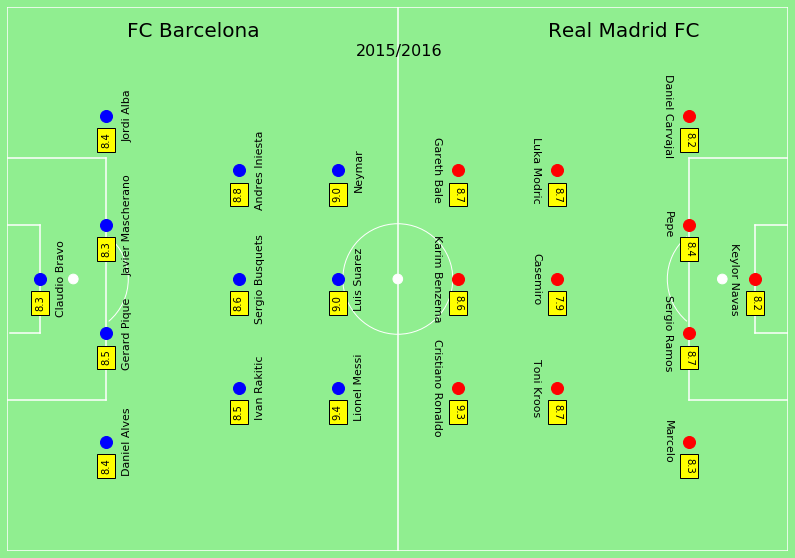

In [52]:
#Create figure
fig=plt.figure(facecolor='lightgreen')
fig.set_size_inches(14, 10)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,90], color="white")
plt.plot([0,130],[90,90], color="white")
plt.plot([130,130],[90,0], color="white")
plt.plot([130,0],[0,0], color="white")
plt.plot([65,65],[0,90], color="white")

#Left Penalty Area
plt.plot([16.5,16.5],[65,25],color="white")
plt.plot([0,16.5],[65,65],color="white")
plt.plot([16.5,0],[25,25],color="white")

#Right Penalty Area
plt.plot([130,113.5],[65,65],color="white")
plt.plot([113.5,113.5],[65,25],color="white")
plt.plot([113.5,130],[25,25],color="white")

#Left 6-yard Box
plt.plot([0,5.5],[54,54],color="white")
plt.plot([5.5,5.5],[54,36],color="white")
plt.plot([5.5,0.5],[36,36],color="white")

#Right 6-yard Box
plt.plot([130,124.5],[54,54],color="white")
plt.plot([124.5,124.5],[54,36],color="white")
plt.plot([124.5,130],[36,36],color="white")

#Prepare Circles
centreCircle = plt.Circle((65,45),9.15,color="white",fill=False)
centreSpot = plt.Circle((65,45),0.8,color="white")
leftPenSpot = plt.Circle((11,45),0.8,color="white")
rightPenSpot = plt.Circle((119,45),0.8,color="white")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="white")
rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="white")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

Barcelona = team_df[team_df['team_long_name']=='FC Barcelona']
Real_Madrid = team_df[team_df['team_long_name']=='Real Madrid CF']
Barcelona_home_matches = pd.merge(Barcelona, match_df, left_on="team_api_id", right_on="home_team_api_id")
matches = pd.merge(Real_Madrid, Barcelona_home_matches, left_on='team_api_id',right_on='away_team_api_id')
latest_match = matches[matches['season']=='2015/2016']
home_players_X = latest_match.iloc[0]['home_player_X1':'home_player_X11']
home_players_Y = latest_match.iloc[0]['home_player_Y1':'home_player_Y11']
home_x = list(home_players_X)
home_y = list(home_players_Y)
for element in range(len(home_x)):
    if element == 0:
        home_x[element] = 45
    else:    
        home_x[element] *= 9
for element in range(len(home_y)):
    home_y[element] *= 5.5
plt.plot(home_y, home_x, 'bo', markersize=12)

home_players = latest_match.iloc[0]['home_player_1':'home_player_11']
home_players = list(home_players)
home_player_names = []
home_player_ratings = []
for i in range(1,12):
    result = pd.merge(player_df, latest_match, left_on="player_api_id", right_on="home_player_"+str(i))
    ratings = pd.merge(playerAttributes_df_1, latest_match, left_on="player_api_id", right_on="home_player_"+str(i))
    name = result.iloc[0]['player_name']
    rating = ratings.iloc[0]['overall_rating']
    home_player_names.append(name)
    home_player_ratings.append(rating/10)
for i in range(len(home_player_names)):
    plt.text(home_y[i]+3.5, home_x[i], home_player_names[i], horizontalalignment='center', verticalalignment='center',rotation=90,fontsize=11)
for i in range(len(home_player_ratings)):
    plt.text(home_y[i], home_x[i]-4, home_player_ratings[i], horizontalalignment='center', verticalalignment='center', rotation=90, bbox=dict(facecolor='yellow', alpha=1.0))
plt.text(20,85,'FC Barcelona',fontsize=20)

away_players_X = latest_match.iloc[0]['away_player_X1':'away_player_X11']
away_players_Y = latest_match.iloc[0]['away_player_Y1':'away_player_Y11']
away_x = list(away_players_X)
away_y = list(away_players_Y)
for element in range(len(away_x)):
    if element == 0:
        away_x[element] = 45
    else:    
        away_x[element] = 90 - (away_x[element] * 9)
for element in range(len(away_y)):
    away_y[element] = 130 - (away_y[element] * 5.5)
plt.plot(away_y, away_x, 'ro', markersize=12)

away_players = latest_match.iloc[0]['away_player_1':'away_player_11']
away_players = list(away_players)
away_player_names = []
away_player_ratings = []
for i in range(1,12):
    result = pd.merge(player_df, latest_match, left_on="player_api_id", right_on="away_player_"+str(i))
    ratings = pd.merge(playerAttributes_df_1, latest_match, left_on="player_api_id", right_on="away_player_"+str(i))
    name = result.iloc[0]['player_name']
    rating = ratings.iloc[0]['overall_rating']
    away_player_names.append(name)
    away_player_ratings.append(rating/10)
for i in range(len(away_player_names)):
    plt.text(away_y[i]-3.5, away_x[i], away_player_names[i], horizontalalignment='center', verticalalignment='center',rotation=-90,fontsize=11)
for i in range(len(away_player_ratings)):
    plt.text(away_y[i], away_x[i]-4, away_player_ratings[i], horizontalalignment='center', verticalalignment='center', rotation=-90, bbox=dict(facecolor='yellow', alpha=1.0))
plt.text(90,85,'Real Madrid FC',fontsize=20)

season = latest_match.iloc[0]['season']
plt.text(58,82, season, fontsize=16)

plt.ylim(0, 90)
plt.xlim(0, 130)

#Display Pitch
plt.show()